### Problem Statement -

An online retail store is trying to understand the various customer purchase patterns for their
firm, you are required to give enough evidence based insights to provide the same.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'OnlineRetail.csv',
 'Online_Retail_project-using_rmf.ipynb',
 'Online_Retail_project.ipynb']

In [4]:
retail = pd.read_csv('OnlineRetail.csv',  encoding='latin-1')

In [5]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
retail.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


In [8]:
retail.shape

(541909, 8)

#### 1. Using the above data, find useful insights about the customer purchasing history that can be an added advantage for the online retailer.


<AxesSubplot:>

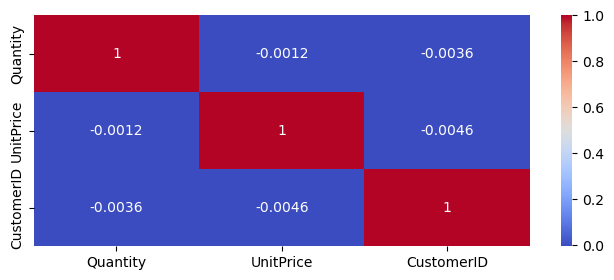

In [9]:
## lets check correlation to see which one feature is more related with customer ID.

import seaborn as sns

plt.figure(figsize=(8,3))
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

sns.heatmap(retail.corr(), annot = True, cmap = 'coolwarm')

In [10]:
# lets group by customer Id to get more insights

cid = retail.groupby('CustomerID').sum().reset_index()

In [11]:
cid.shape

(4372, 3)

In [12]:
541909 - 4372 ## just was checking unique customers 

537537

In [13]:
cid.head(20)

,CustomerID,Quantity,UnitPrice
0,12346.0,0,2.08
1,12347.0,2458,481.21
2,12348.0,2341,178.71
3,12349.0,631,605.10
4,12350.0,197,65.30
5,12352.0,470,2211.10
6,12353.0,20,24.30
7,12354.0,530,261.22
8,12355.0,240,54.65
9,12356.0,1591,188.87


In [14]:
product = retail.groupby('Description').sum().reset_index()

In [15]:
# created a new variable to help with viasualization

a= product.head(10)
a

,Description,Quantity,UnitPrice,CustomerID
0,4 PURPLE FLOCK DINNER CANDLES,144,100.67,631941.0
1,50'S CHRISTMAS GIFT BAG LARGE,1913,185.28,1687133.0
2,DOLLY GIRL BEAKER,2448,271.38,2072298.0
3,I LOVE LONDON MINI BACKPACK,389,405.80,1089559.0
4,I LOVE LONDON MINI RUCKSACK,1,4.15,14646.0
5,NINE DRAWER OFFICE TIDY,59,545.94,471444.0
6,OVAL WALL MIRROR DIAMANTE,233,1730.64,981933.0
7,RED SPOT GIFT BAG LARGE,1727,144.35,1448991.0
8,SET 2 TEA TOWELS I LOVE LONDON,2781,999.05,3177250.0
9,SPACEBOY BABY GIFT SET,493,2995.87,2119834.0


In [16]:
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [18]:
rt = retail.dropna()

In [19]:
rt.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [20]:
rt.shape

(406829, 8)

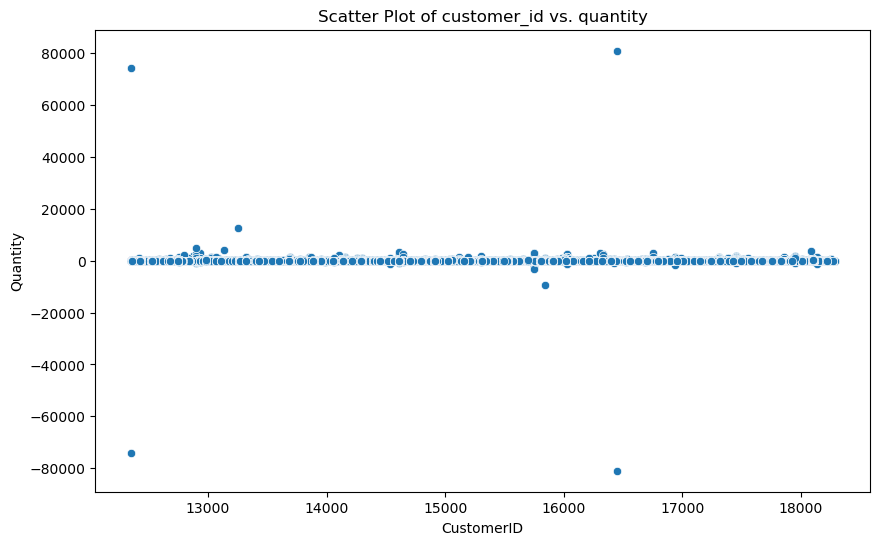

In [21]:
# lets try scatter plot

plt.figure(figsize=(10, 6))
sns.scatterplot(x='CustomerID', y='Quantity', data=rt)
plt.title('Scatter Plot of customer_id vs. quantity')
plt.show()

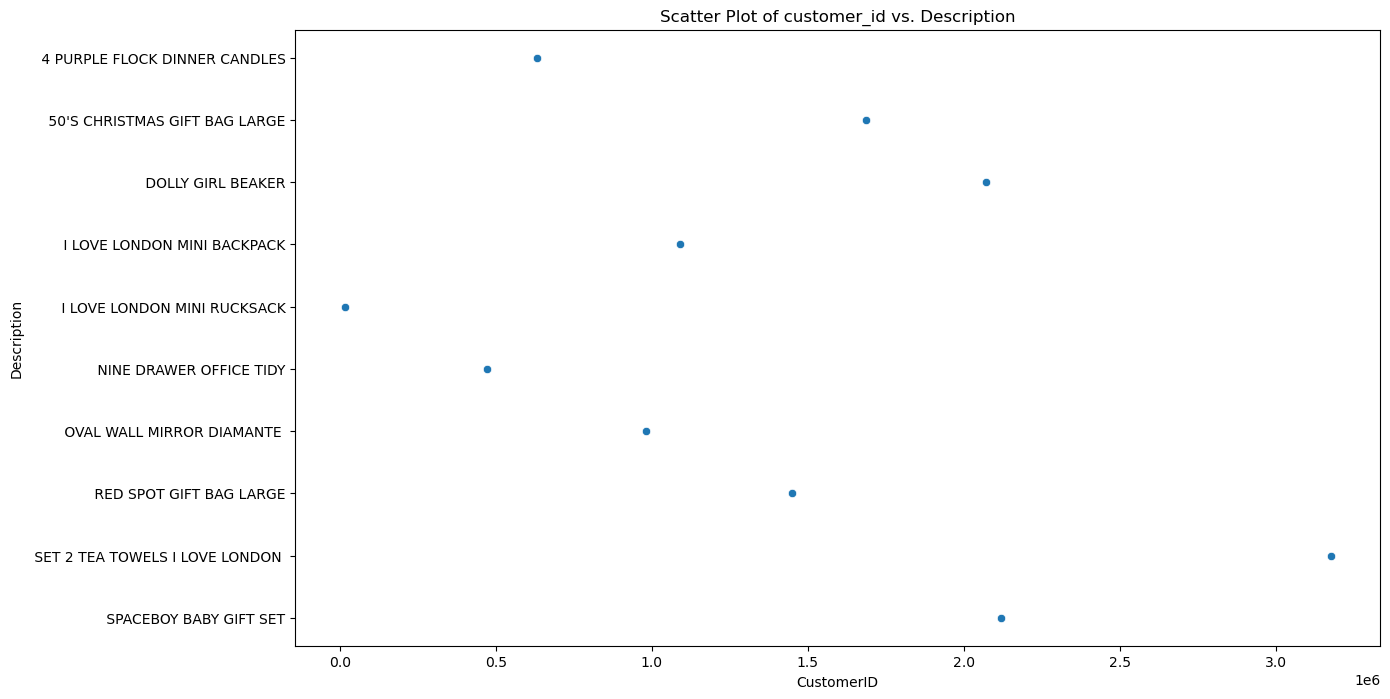

In [23]:
# lets try it on the grouped description dataframe


plt.figure(figsize=(14, 8))
sns.scatterplot(x='CustomerID', y='Description', data=a)
plt.title('Scatter Plot of customer_id vs. Description')
plt.show()

## too many products to visualize. hence only displaying 10 of them

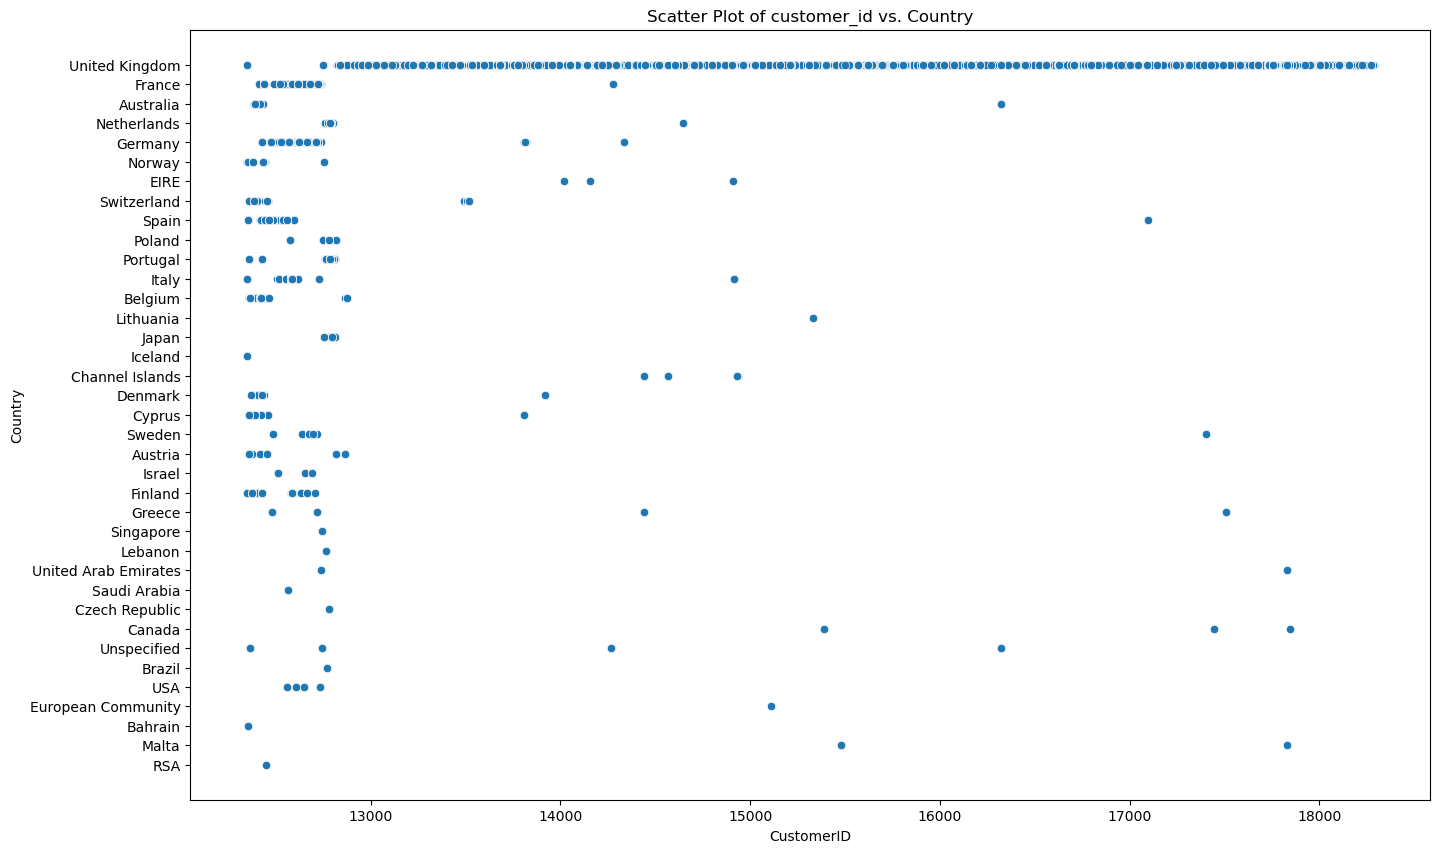

In [24]:

plt.figure(figsize=(16, 10))
sns.scatterplot(x='CustomerID', y='Country', data=rt)
plt.title('Scatter Plot of customer_id vs. Country')
plt.show()

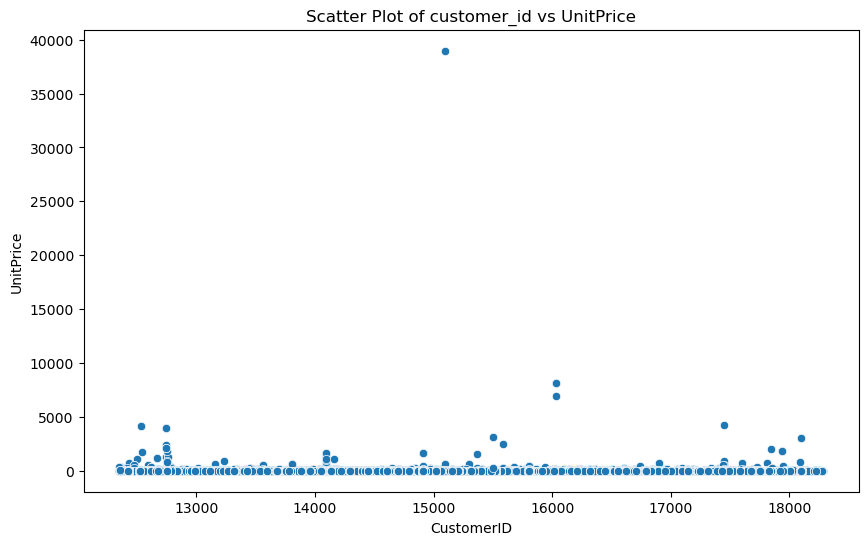

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CustomerID', y='UnitPrice', data=rt)
plt.title('Scatter Plot of customer_id vs UnitPrice')
plt.show()

In [26]:
rt.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [27]:
# taking the groupby customer id 

cid.head()

,CustomerID,Quantity,UnitPrice
0,12346.0,0,2.08
1,12347.0,2458,481.21
2,12348.0,2341,178.71
3,12349.0,631,605.10
4,12350.0,197,65.30


In [28]:
cid[cid['UnitPrice'] == cid['UnitPrice'].max()]

#Onliner[Onliner.Country == 'United Kingdom'].CustomerID.unique()) 

,CustomerID,Quantity,UnitPrice
1300,14096.0,16335,41376.33


In [29]:
rt['Total_amount'] = rt['Quantity'] * rt['UnitPrice']

C:\Users\SWATI\AppData\Local\Temp\ipykernel_25664\4065489404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt['Total_amount'] = rt['Quantity'] * rt['UnitPrice']


In [30]:
# Group by item description, calculate the count and sum of total amount paid
item_summary = rt.groupby('Description').agg({
    'Quantity': 'count',
    'Total_amount': 'sum'
}).reset_index()

# Sort the items by count in ascending order
item_summary = item_summary.sort_values(by='Quantity')

# Find the least purchased item (the one with the smallest count)
least_purchased_item = item_summary.iloc[0]

print("DataFrame with Item Summary:")
print(item_summary)
print("\nLeast Purchased Item:")
print(least_purchased_item)

DataFrame with Item Summary:
                             Description  Quantity  Total_amount
1072  EASTER CRAFT IVY WREATH WITH CHICK         1          1.95
2092         MISELTOE HEART WREATH CREAM         1        996.00
2764           RED ROSE AND LACE C/COVER         1          8.85
2288      PAINTED HEART WREATH WITH BELL         1         15.00
3402              SWEETHEART KEY CABINET         1         -5.55
...                                  ...       ...           ...
2355                       PARTY BUNTING      1416      67687.53
217        ASSORTED COLOUR BIRD ORNAMENT      1418      56499.22
1771             JUMBO BAG RED RETROSPOT      1662      83236.76
2780            REGENCY CAKESTAND 3 TIER      1905     132870.40
3716  WHITE HANGING HEART T-LIGHT HOLDER      2070      93823.85

[3896 rows x 3 columns]

Least Purchased Item:
Description     EASTER CRAFT IVY WREATH WITH CHICK
Quantity                                         1
Total_amount                             

In [31]:
item_summary.head(30)

,Description,Quantity,Total_amount
1072,EASTER CRAFT IVY WREATH WITH CHICK,1,1.95
2092,MISELTOE HEART WREATH CREAM,1,996.00
2764,RED ROSE AND LACE C/COVER,1,8.85
2288,PAINTED HEART WREATH WITH BELL,1,15.00
3402,SWEETHEART KEY CABINET,1,-5.55
192,ANTIQUE RASPBERRY FLOWER EARRINGS,1,8.50
510,BLUE/YELLOW CERAMIC CANDLE HOLDER,1,6.60
509,BLUE/NAT SHELL NECKLACE W PENDANT,1,5.95
508,BLUE/GREEN SHELL NECKLACE W PENDANT,1,5.95
1299,"FOOD COVER WITH BEADS , SET 2 SIZES",1,11.25


In [32]:
item_summary.tail()

,Description,Quantity,Total_amount
2355,PARTY BUNTING,1416,67687.53
217,ASSORTED COLOUR BIRD ORNAMENT,1418,56499.22
1771,JUMBO BAG RED RETROSPOT,1662,83236.76
2780,REGENCY CAKESTAND 3 TIER,1905,132870.40
3716,WHITE HANGING HEART T-LIGHT HOLDER,2070,93823.85


 The observation are as follows :
        
- The major number of customers are from united kingdom.
- The least purchased item is "EASTER CRAFT IVY WREATH WITH CHICK"
- The most purchased item is "WHITE HANGING HEART T-LIGHT HOLDER"
- The customerId '14096' customer spent the highest amount.

### 2. Segment the customers based on their purchasing behavior.


k -means clustering Models lets start

In [33]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [39]:
rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [35]:
rt.describe()

,Quantity,UnitPrice,CustomerID,Total_amount
count,406829.000000,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570,20.401854
std,248.693370,69.315162,1713.600303,427.591718
min,-80995.000000,0.000000,12346.000000,-168469.600000
25%,2.000000,1.250000,13953.000000,4.200000
50%,5.000000,1.950000,15152.000000,11.100000
75%,12.000000,3.750000,16791.000000,19.500000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [36]:
rt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   InvoiceNo     406829 non-null  object 
 1   StockCode     406829 non-null  object 
 2   Description   406829 non-null  object 
 3   Quantity      406829 non-null  int64  
 4   InvoiceDate   406829 non-null  object 
 5   UnitPrice     406829 non-null  float64
 6   CustomerID    406829 non-null  float64
 7   Country       406829 non-null  object 
 8   Total_amount  406829 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 31.0+ MB


### Lets prepare the Data according to RFM


- R (Recency): Number of days since last purchase

- F (Frequency): Number of tracsactions

- M (Monetary): Total amount of transactions (revenue contributed)

#### Recency

In [42]:
# Recency 


rt['InvoiceDate'] = pd.to_datetime(rt['InvoiceDate'],format = '%m/%d/%Y %H:%M')
max_date = max(rt['InvoiceDate'])
rt['Recency'] = max_date - rt['InvoiceDate']
rt['Recency'] = rt['Recency'].dt.days #to get number of days only
rfm_r = rt.groupby('CustomerID')['Recency'].min()
rfm_r = rfm_r.reset_index()
rfm_r.head(10)

C:\Users\SWATI\AppData\Local\Temp\ipykernel_25664\1880595586.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt['InvoiceDate'] = pd.to_datetime(rt['InvoiceDate'],format = '%m/%d/%Y %H:%M')
C:\Users\SWATI\AppData\Local\Temp\ipykernel_25664\1880595586.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt['Recency'] = max_date - rt['InvoiceDate']
C:\Users\SWATI\AppData\Local\Temp\ipykernel_25664\1880595586.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

,CustomerID,Recency
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309
5,12352.0,35
6,12353.0,203
7,12354.0,231
8,12355.0,213
9,12356.0,22


#### Monetory 

In [44]:
# Monetory


rt['Monetory'] = rt['Quantity']*rt['UnitPrice']
rfm_m = rt.groupby('CustomerID')['Monetory'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head(10)

C:\Users\SWATI\AppData\Local\Temp\ipykernel_25664\2123013132.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt['Monetory'] = rt['Quantity']*rt['UnitPrice']


,CustomerID,Monetory
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
5,12352.0,1545.41
6,12353.0,89.00
7,12354.0,1079.40
8,12355.0,459.40
9,12356.0,2811.43


#### Frequency 

In [46]:
# Frquency

rfm_f = rt.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns=['CustomerID','Frequency']
rfm_f.head(10)

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
5,12352.0,95
6,12353.0,4
7,12354.0,58
8,12355.0,13
9,12356.0,59


In [47]:
### Now lets merge it 

# monetory and frequency are being merged here in rfm

rfm = pd.merge(rfm_m ,rfm_f,on = 'CustomerID', how= 'inner')
rfm.head()

,CustomerID,Monetory,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [48]:
# now take the above merge rfm and merge with the remaining recency

rfm = pd.merge(rfm , rfm_r ,how = 'inner')
rfm.head()

,CustomerID,Monetory,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


<AxesSubplot:>

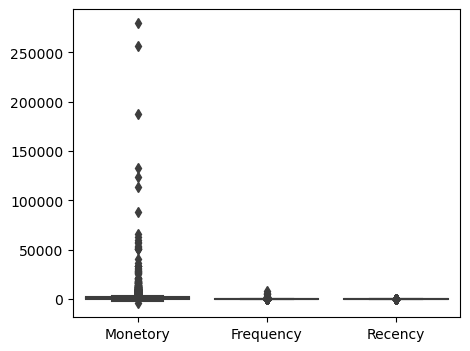

In [49]:
# Outlier Detecion of RFM 

attributes = ['Monetory','Frequency','Recency']
plt.rcParams['figure.figsize']=[5,4]

sns.boxplot(data=rfm[attributes])

In [50]:
## lets remove the outliers 


# for Amount

Q1 = rfm.Monetory.quantile(0.15)
Q3 = rfm.Monetory.quantile(0.85)
IQR = Q3 - Q1
rfm = rfm[(rfm.Monetory >= Q1 - 1.5*IQR) & (rfm.Monetory <= Q3 + 1.5*IQR)]


# for Frequency

Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]


# for Recency

Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

<AxesSubplot:>

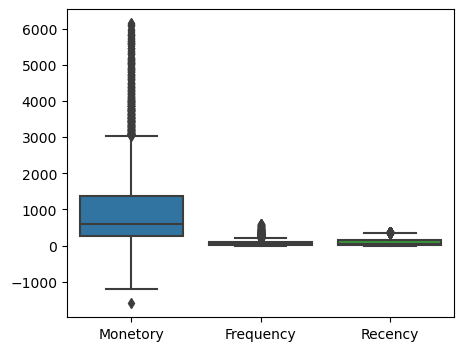

In [51]:
attributes = ['Monetory','Frequency','Recency']
plt.rcParams['figure.figsize']=[5,4]

sns.boxplot(data=rfm[attributes])

In [52]:
## lets standardize


rfm_df = rfm[['Monetory','Frequency','Recency']]

scaler = StandardScaler()
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4158, 3)

In [53]:
type(rfm_df_scaled)

numpy.ndarray

In [55]:
# lets convert rfm_df_scaled to dataframe

rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled

,0,1,2
0,-0.907248,-0.800683,2.265703
1,2.838479,1.330993,-0.924172
2,0.654694,-0.457246,-0.205465
3,0.620200,0.040145,-0.756802
4,-0.616628,-0.623043,2.108178
...,...,...,...
4153,-0.756115,-0.717785,-0.215311
4154,-0.750292,-0.705942,1.793129
4155,-0.837009,-0.741470,0.838135
4156,-0.753769,-0.670414,-0.865100


In [56]:
rfm_df_scaled.columns = ['Monetory', 'Frquency', 'Recency'] # give the col names as well
rfm_df_scaled.head()

,Monetory,Frquency,Recency
0,-0.907248,-0.800683,2.265703
1,2.838479,1.330993,-0.924172
2,0.654694,-0.457246,-0.205465
3,0.620200,0.040145,-0.756802
4,-0.616628,-0.623043,2.108178


### K-means

In [59]:
from sklearn.cluster import KMeans

In [60]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [61]:
kmeans.labels_

array([0, 3, 2, ..., 0, 2, 1])

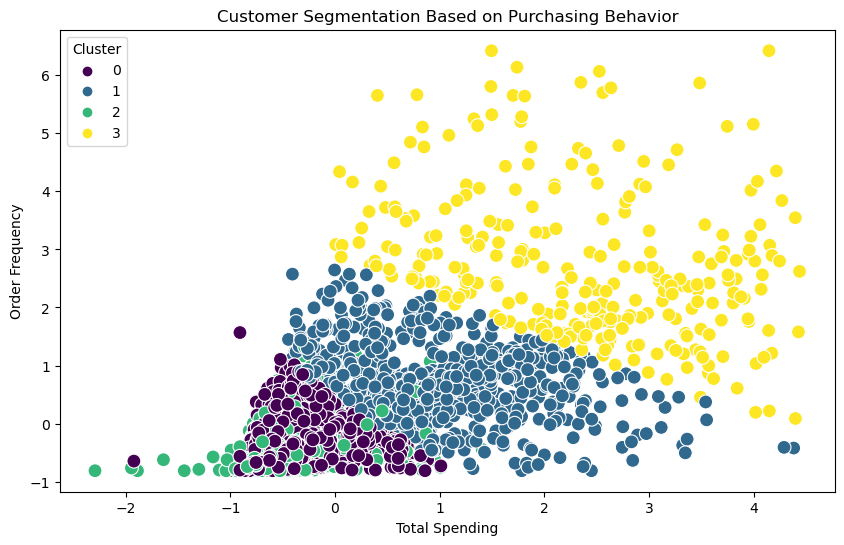

      Monetory  Frquency   Recency  Cluster
0    -0.907248 -0.800683  2.265703        2
1     2.838479  1.330993 -0.924172        3
2     0.654694 -0.457246 -0.205465        0
3     0.620200  0.040145 -0.756802        1
4    -0.616628 -0.623043  2.108178        2
...        ...       ...       ...      ...
4153 -0.756115 -0.717785 -0.215311        0
4154 -0.750292 -0.705942  1.793129        2
4155 -0.837009 -0.741470  0.838135        2
4156 -0.753769 -0.670414 -0.865100        0
4157  0.689492  0.004617 -0.520515        1

[4158 rows x 4 columns]


In [64]:

n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10).fit(rfm_df_scaled)  # Set n_init explicitly

# Add cluster labels to the original DataFrame
rfm_df_scaled['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_df_scaled, x='Monetory', y='Frquency', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segmentation Based on Purchasing Behavior')
plt.xlabel('Total Spending')
plt.ylabel('Order Frequency')
plt.legend(title='Cluster')
plt.show()
print(rfm_df_scaled)

#### here are the 4 clusters made based on the frequency, monetory and recency.

In [66]:
rfm_df_scaled[rfm_df_scaled['Cluster']==0].sort_values(by = ['Monetory', 'Frquency','Recency'], ascending = [True,False,False])
#customer who spend the least

,Monetory,Frquency,Recency,Cluster
3677,-1.919984,-0.646729,-0.451598,0
2373,-1.024400,-0.776998,-0.461443,0
3311,-1.004889,-0.812526,0.464014,0
1458,-0.944966,-0.753313,0.464014,0
1702,-0.922413,-0.788840,-0.904481,0
...,...,...,...,...
2117,0.837339,-0.504617,0.404943,0
2093,0.848742,-0.623043,-0.146394,0
3845,0.859675,-0.812526,-0.107012,0
2764,0.884843,-0.623043,-0.235001,0


In [68]:
rfm_df_scaled[rfm_df_scaled['Cluster']==3].sort_values(by = ['Monetory', 'Frquency','Recency'], ascending = [False,False,False])
#customers who spend the most

,Monetory,Frquency,Recency,Cluster
1197,4.435322,2.621842,-0.707575,3
1199,4.424876,1.579689,-0.894636,3
2520,4.396092,0.087515,-0.057786,3
3608,4.394771,3.545568,-0.372835,3
217,4.266591,3.841634,-0.284228,3
...,...,...,...,...
1636,0.167176,4.161386,-0.687885,3
2164,0.068318,3.071862,-0.825719,3
2595,0.058984,2.870537,-0.550051,3
828,0.043219,4.339025,-0.934017,3


In [ ]:
References :
    
- https://www.kaggle.com/code/mostafanabil5005/e-commerce-customer-analysis
- https://www.kaggle.com/code/yogita19/major-project-cltv 
    